$\beta = -1$ means that $\beta$ is selected at random in each iteration.

In [19]:
import pandas as pd
from grasp_iters import read_results

# iters = read_results("rl1323_882_441_0_p44_a3")
iters = read_results("rat783_522_261_0_p20_a2")

In [20]:
iters

,iter,beta,RGD_OF,AFVS_OF,time,is_new_best
0,0,0.764880,130,128,0.240514,True
1,1,0.223220,127,111,0.526771,True
2,2,0.676699,171,116,1.479618,False
3,3,0.880670,174,121,2.832945,False
4,4,0.514568,150,110,3.488692,True
...,...,...,...,...,...,...
4995,4995,0.481696,163,137,3194.595398,False
4996,4996,0.761338,176,139,3194.947613,False
4997,4997,0.407531,140,118,3195.208658,False
4998,4998,0.478522,138,105,3196.069135,False


In [21]:
improvs = iters[iters["is_new_best"] == True].drop("is_new_best", axis=1)
improvs

,iter,beta,RGD_OF,AFVS_OF,time
0,0,0.764880,130,128,0.240514
1,1,0.223220,127,111,0.526771
4,4,0.514568,150,110,3.488692
8,8,0.137148,130,100,6.077239
11,11,0.311568,157,98,8.682613
19,19,0.119498,160,95,17.508947
51,51,0.189892,121,93,42.765096
213,213,0.531542,140,92,152.635973
947,947,0.618655,131,91,633.430784


In [22]:
improvs.count()[0]

9

In [23]:
percents = improvs["AFVS_OF"].pct_change().mul(-100)
percents

0            NaN
1      13.281250
4       0.900901
8       9.090909
11      2.000000
19      3.061224
51      2.105263
213     1.075269
947     1.086957
Name: AFVS_OF, dtype: float64

In [24]:
improvs.insert(loc=4, column="imp", value=percents)
improvs

,iter,beta,RGD_OF,AFVS_OF,imp,time
0,0,0.764880,130,128,NaN,0.240514
1,1,0.223220,127,111,13.281250,0.526771
4,4,0.514568,150,110,0.900901,3.488692
8,8,0.137148,130,100,9.090909,6.077239
11,11,0.311568,157,98,2.000000,8.682613
19,19,0.119498,160,95,3.061224,17.508947
51,51,0.189892,121,93,2.105263,42.765096
213,213,0.531542,140,92,1.075269,152.635973
947,947,0.618655,131,91,1.086957,633.430784


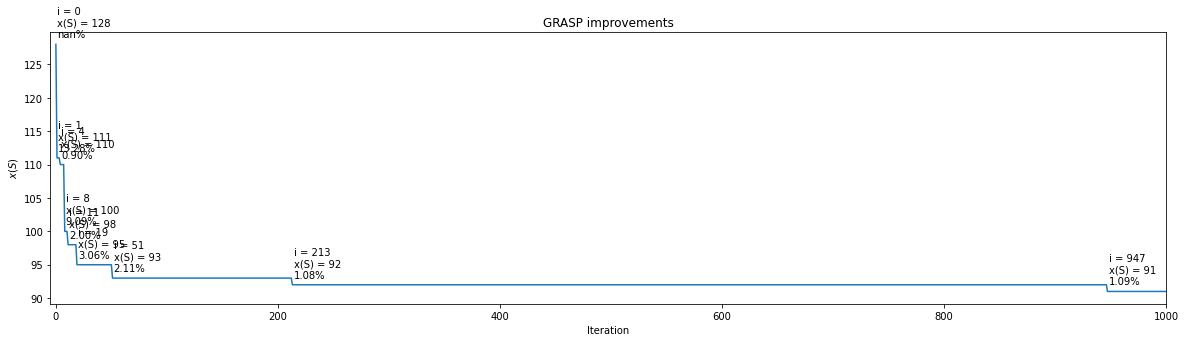

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

plt.plot(
    iters["iter"],
    iters["AFVS_OF"].cummin(),
)

for _, row in improvs.iterrows():
    of = int(row["AFVS_OF"])
    i = int(row["iter"])
    percent = row["imp"]

    plt.annotate(
        f"i = {i}\nx(S) = {of}\n{percent:.2f}%",
        (i, of),
        xytext=(i + 1, of + 1),
    )

plt.xlim(-5, 1000)
# plt.margins(0.001)
plt.title(f"GRASP improvements")
plt.ylabel("$x(S)$")
plt.xlabel("Iteration")

plt.show()